In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [5]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, 
                                      factor=.5, 
                                      noise=.05)
noisy_circles

(array([[-0.3159566 , -0.31298943],
        [-0.0590333 ,  1.08814983],
        [-0.26382526,  0.96864062],
        ...,
        [-0.41410876,  0.98682717],
        [ 0.6962036 ,  0.68327683],
        [ 0.83089162,  0.51826537]]),
 array([1, 0, 0, ..., 0, 0, 0], dtype=int64))

In [8]:
n_cir = noisy_circles[0]

from sklearn.preprocessing import StandardScaler
n_cir = StandardScaler().fit_transform(n_cir)

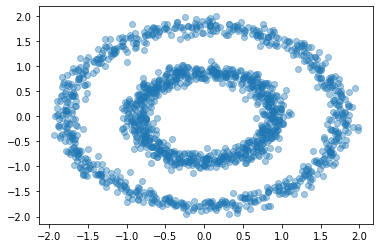

In [9]:
# Add points array on the plate
plt.scatter(n_cir[:, 0], n_cir[:, 1], alpha=0.4)

In [10]:
# Сравним с Кмеанс
from sklearn.cluster import KMeans

In [12]:
K_means = KMeans(n_clusters = 2).fit(n_cir)
K_means.labels_

array([1, 0, 0, ..., 0, 0, 0])

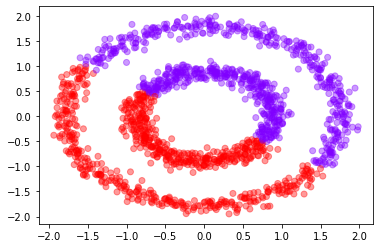

In [21]:
plt.scatter(n_cir[:, 0], n_cir[:, 1], c=K_means.labels_, marker='o', cmap='rainbow', alpha=0.4)

In [25]:
dbcluster_cir = DBSCAN(eps=0.3, min_samples=5).fit(n_cir)

In [26]:
dbclables_cir = dbcluster_cir.labels_
dbclables_cir

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

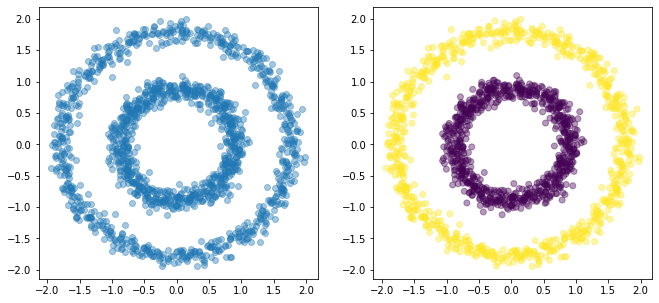

In [27]:
# plot result
f, axes = plt.subplots(1,2, figsize=(11, 5))
axes[0].scatter(n_cir[:, 0], n_cir[:, 1], alpha=.4)
axes[1].scatter(n_cir[:, 0], n_cir[:, 1], alpha=.4, c=dbclables_cir)
plt.show()

FCM

In [28]:
from fcmeans import FCM

In [29]:
fcm_cir = FCM(n_clusters=2)
fcm_cir.fit(n_cir)

In [33]:
f_cir_centers = fcm_cir.centers
fcm_cir_labels = fcm_cir.predict(n_cir)
f_cir_centers

array([[ 0.23094762, -0.76466577],
       [-0.23109521,  0.76519157]])

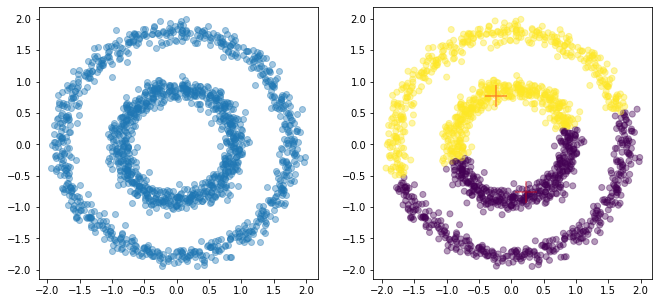

In [39]:
# plot result
f, axes = plt.subplots(1,2, figsize=(11, 5))
axes[0].scatter(n_cir[:, 0], n_cir[:, 1], alpha=.4)
axes[1].scatter(n_cir[:, 0], n_cir[:, 1], alpha=.4, c=fcm_cir_labels)
axes[1].scatter(f_cir_centers[:, 0], f_cir_centers[:, 1], marker='+', alpha=.4, s=500, c='red')
plt.show()

In [41]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
noisy_moons

(array([[ 0.60846291, -0.48809894],
        [-0.01068527,  0.31337192],
        [-0.06031732,  0.32453034],
        ...,
        [ 1.94356282,  0.21166338],
        [ 0.30084671,  0.9271337 ],
        [-0.53920342,  0.79870704]]),
 array([1, 1, 1, ..., 1, 0, 0], dtype=int64))

In [42]:
n_moon = noisy_moons[0]

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
n_moon = StandardScaler().fit_transform(n_moon)

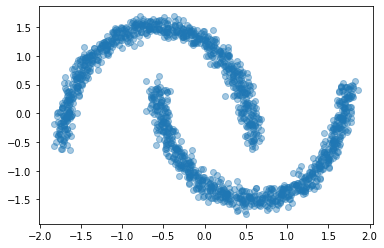

In [46]:
plt.scatter(n_moon[:, 0], n_moon[:, 1], alpha=.4)

In [105]:
dbcluster_moon = DBSCAN(eps=0.2, min_samples=5).fit(n_moon)
dbclables_moon = dbcluster_moon.labels_
dbclables_moon

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

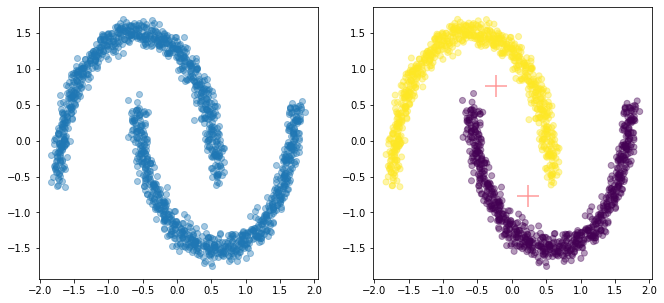

In [106]:
# plot result
f, axes = plt.subplots(1,2, figsize=(11, 5))
axes[0].scatter(n_moon[:, 0], n_moon[:, 1], alpha=.4)
axes[1].scatter(n_moon[:, 0], n_moon[:, 1], alpha=.4, c=dbclables_moon)
axes[1].scatter(f_cir_centers[:, 0], f_cir_centers[:, 1], marker='+', alpha=.4, s=500, c='red')
plt.show()

Next examples

In [108]:
np.random.seed(0)
random_state=3
blobs = datasets.make_blobs(n_samples=n_samples,
                           cluster_std=[0.5, 1.5, 1.0],
                           random_state=random_state)
b1 = blobs[0]

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
b1 = StandardScaler().fit_transform(b1)

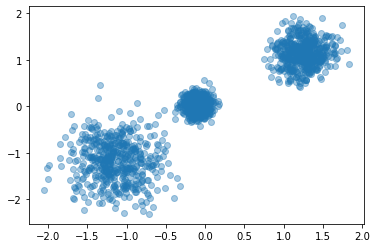

In [111]:
plt.scatter(b1[:, 0], b1[:, 1], alpha=.4)

In [112]:
dbcluster_b1 = DBSCAN(eps=0.2, min_samples=5).fit(b1)
dbclables_b1 = dbcluster_b1.labels_
dbclables_b1

array([-1,  0,  1, ...,  1,  1,  1], dtype=int64)

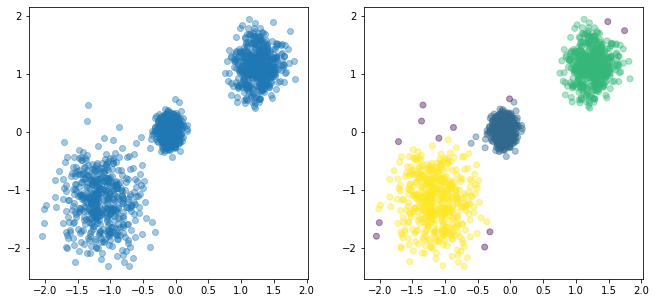

In [113]:
# plot result
f, axes = plt.subplots(1,2, figsize=(11, 5))
axes[0].scatter(b1[:, 0], b1[:, 1], alpha=.4)
axes[1].scatter(b1[:, 0], b1[:, 1], alpha=.4, c=dbclables_b1)
plt.show()

In [114]:
# Рассмотрим алгоритм нечеткой кластеризации

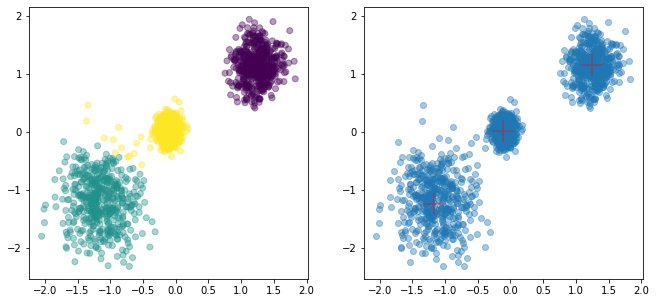

In [120]:
fcm_b1 = FCM(n_clusters=3)
fcm_b1.fit(b1)
fcm_b1_centers = fcm_b1.centers
fcm_b1_labels = fcm_b1.predict(b1)

# plot result
f, axes = plt.subplots(1,2, figsize=(11, 5))
axes[0].scatter(b1[:, 0], b1[:, 1], alpha=.4, c=fcm_b1_labels)
axes[1].scatter(b1[:, 0], b1[:, 1], marker='o', alpha=.4)
axes[1].scatter(fcm_b1_centers[:, 0], fcm_b1_centers[:, 1], marker='+', alpha=.4, s=500, c='r')
plt.show()